In [1]:
import pandas as pd

In [2]:
dfA = pd.read_csv("data/PriceData_A.csv")
dfB = pd.read_csv("data/PriceData_B.csv")

In [3]:
dfA

,Name,Date,Run_1,Run_2,Run_3,Run_4,Run_5
0,PowerPrice,2024-07-01 00:00:00,95.6148,66.1730,54.9844,36.9479,49.0724
1,PowerPrice,2024-07-01 01:00:00,96.1324,64.9755,56.4174,38.3255,50.0532
2,PowerPrice,2024-07-01 02:00:00,94.6488,62.7985,55.7516,36.1756,51.3747
3,PowerPrice,2024-07-01 03:00:00,95.3959,63.4804,55.2520,36.9074,51.5575
4,PowerPrice,2024-07-01 04:00:00,91.2709,61.4738,54.6769,39.4583,52.1937
...,...,...,...,...,...,...,...
21931,PowerPrice,2026-12-31 19:00:00,63.5930,92.9403,92.5183,89.8019,91.3753
21932,PowerPrice,2026-12-31 20:00:00,71.1794,88.5462,81.9221,85.0295,88.0578
21933,PowerPrice,2026-12-31 21:00:00,67.6745,88.8596,87.8114,79.6555,87.0413
21934,PowerPrice,2026-12-31 22:00:00,93.8097,99.9983,103.6553,91.3615,103.6381


In [4]:
dfB

,Name,Date,Run_1,Run_2,Run_3,Run_4,Run_5
0,PowerPrice,2024-07-01 00:00:00,28.2852,71.2856,95.6681,58.6957,45.3764
1,PowerPrice,2024-07-01 01:00:00,29.3784,71.7476,96.2377,59.1644,46.2797
2,PowerPrice,2024-07-01 02:00:00,26.4723,44.1967,95.2565,70.4694,57.4796
3,PowerPrice,2024-07-01 03:00:00,26.9855,44.5004,95.6135,57.8124,70.6980
4,PowerPrice,2024-07-01 04:00:00,26.2213,43.9792,95.1064,57.3067,70.3045
...,...,...,...,...,...,...,...
21931,PowerPrice,2026-12-31 19:00:00,60.9294,75.1879,92.7116,83.2406,110.6395
21932,PowerPrice,2026-12-31 20:00:00,61.1802,75.4543,93.0647,83.5552,111.0784
21933,PowerPrice,2026-12-31 21:00:00,60.4080,74.5625,92.1054,82.7722,111.5937
21934,PowerPrice,2026-12-31 22:00:00,77.6699,91.7766,109.3514,99.7723,127.3774


In [5]:
# Reshape from wide to long
dfA_long = pd.melt(dfA, id_vars=['Name', 'Date'], value_vars=['Run_1', 'Run_2', 'Run_3', 'Run_4', 'Run_5'],
                   var_name='Run', value_name='Value')

print("\nLong format:")
dfA_long



Long format:


,Name,Date,Run,Value
0,PowerPrice,2024-07-01 00:00:00,Run_1,95.6148
1,PowerPrice,2024-07-01 01:00:00,Run_1,96.1324
2,PowerPrice,2024-07-01 02:00:00,Run_1,94.6488
3,PowerPrice,2024-07-01 03:00:00,Run_1,95.3959
4,PowerPrice,2024-07-01 04:00:00,Run_1,91.2709
...,...,...,...,...
109675,PowerPrice,2026-12-31 19:00:00,Run_5,91.3753
109676,PowerPrice,2026-12-31 20:00:00,Run_5,88.0578
109677,PowerPrice,2026-12-31 21:00:00,Run_5,87.0413
109678,PowerPrice,2026-12-31 22:00:00,Run_5,103.6381


In [6]:
# Reshape from wide to long
dfB_long = pd.melt(dfB, id_vars=['Name', 'Date'], value_vars=['Run_1', 'Run_2', 'Run_3', 'Run_4', 'Run_5'],
                   var_name='Run', value_name='Value')

print("\nLong format:")
dfB_long



Long format:


,Name,Date,Run,Value
0,PowerPrice,2024-07-01 00:00:00,Run_1,28.2852
1,PowerPrice,2024-07-01 01:00:00,Run_1,29.3784
2,PowerPrice,2024-07-01 02:00:00,Run_1,26.4723
3,PowerPrice,2024-07-01 03:00:00,Run_1,26.9855
4,PowerPrice,2024-07-01 04:00:00,Run_1,26.2213
...,...,...,...,...
109675,PowerPrice,2026-12-31 19:00:00,Run_5,110.6395
109676,PowerPrice,2026-12-31 20:00:00,Run_5,111.0784
109677,PowerPrice,2026-12-31 21:00:00,Run_5,111.5937
109678,PowerPrice,2026-12-31 22:00:00,Run_5,127.3774


In [7]:


# Columns to join on
# In this example, we're joining on 'id' and 'age'
merge_on_columns = ['Name', 'Date', 'Run']

# Perform the join based on the specified columns
merged_df = pd.merge(dfA_long, dfB_long, on=merge_on_columns)

# Print the merged DataFrame
print("Merged DataFrame:")
merged_df


Merged DataFrame:


,Name,Date,Run,Value_x,Value_y
0,PowerPrice,2024-07-01 00:00:00,Run_1,95.6148,28.2852
1,PowerPrice,2024-07-01 01:00:00,Run_1,96.1324,29.3784
2,PowerPrice,2024-07-01 02:00:00,Run_1,94.6488,26.4723
3,PowerPrice,2024-07-01 03:00:00,Run_1,95.3959,26.9855
4,PowerPrice,2024-07-01 04:00:00,Run_1,91.2709,26.2213
...,...,...,...,...,...
109675,PowerPrice,2026-12-31 19:00:00,Run_5,91.3753,110.6395
109676,PowerPrice,2026-12-31 20:00:00,Run_5,88.0578,111.0784
109677,PowerPrice,2026-12-31 21:00:00,Run_5,87.0413,111.5937
109678,PowerPrice,2026-12-31 22:00:00,Run_5,103.6381,127.3774


In [8]:
merged_df.rename(columns = {'Value_x':'Value_A', 'Value_y':'Value_B'}, inplace = True)
merged_df

,Name,Date,Run,Value_A,Value_B
0,PowerPrice,2024-07-01 00:00:00,Run_1,95.6148,28.2852
1,PowerPrice,2024-07-01 01:00:00,Run_1,96.1324,29.3784
2,PowerPrice,2024-07-01 02:00:00,Run_1,94.6488,26.4723
3,PowerPrice,2024-07-01 03:00:00,Run_1,95.3959,26.9855
4,PowerPrice,2024-07-01 04:00:00,Run_1,91.2709,26.2213
...,...,...,...,...,...
109675,PowerPrice,2026-12-31 19:00:00,Run_5,91.3753,110.6395
109676,PowerPrice,2026-12-31 20:00:00,Run_5,88.0578,111.0784
109677,PowerPrice,2026-12-31 21:00:00,Run_5,87.0413,111.5937
109678,PowerPrice,2026-12-31 22:00:00,Run_5,103.6381,127.3774


In [9]:
merged_df_diff = merged_df.copy()
merged_df_diff["Difference"] = merged_df["Value_A"] - merged_df["Value_B"]
merged_df_diff["Percent_Difference"] = (merged_df["Value_A"] - merged_df["Value_B"]) / merged_df["Value_A"] 
merged_df_diff["Absolute_Difference"] = abs(merged_df["Value_A"] - merged_df["Value_B"])
merged_df_diff["Absolute_Percent_Difference"] = abs((merged_df["Value_A"] - merged_df["Value_B"]) / merged_df["Value_A"])
merged_df_diff

,Name,Date,Run,Value_A,Value_B,Difference,Percent_Difference,Absolute_Difference,Absolute_Percent_Difference
0,PowerPrice,2024-07-01 00:00:00,Run_1,95.6148,28.2852,67.3296,0.704176,67.3296,0.704176
1,PowerPrice,2024-07-01 01:00:00,Run_1,96.1324,29.3784,66.7540,0.694396,66.7540,0.694396
2,PowerPrice,2024-07-01 02:00:00,Run_1,94.6488,26.4723,68.1765,0.720310,68.1765,0.720310
3,PowerPrice,2024-07-01 03:00:00,Run_1,95.3959,26.9855,68.4104,0.717121,68.4104,0.717121
4,PowerPrice,2024-07-01 04:00:00,Run_1,91.2709,26.2213,65.0496,0.712709,65.0496,0.712709
...,...,...,...,...,...,...,...,...,...
109675,PowerPrice,2026-12-31 19:00:00,Run_5,91.3753,110.6395,-19.2642,-0.210825,19.2642,0.210825
109676,PowerPrice,2026-12-31 20:00:00,Run_5,88.0578,111.0784,-23.0206,-0.261426,23.0206,0.261426
109677,PowerPrice,2026-12-31 21:00:00,Run_5,87.0413,111.5937,-24.5524,-0.282078,24.5524,0.282078
109678,PowerPrice,2026-12-31 22:00:00,Run_5,103.6381,127.3774,-23.7393,-0.229060,23.7393,0.229060


In [10]:
merged_df_diff['Date'] = pd.to_datetime(merged_df_diff['Date'])
merged_df_diff['Year'] = merged_df_diff['Date'].dt.year
merged_df_diff['Month'] = merged_df_diff['Date'].dt.month
merged_df_diff['Day_Of_Week'] = merged_df_diff['Date'].dt.dayofweek
merged_df_diff['Hour_Of_Day'] = merged_df_diff['Date'].dt.hour
merged_df_diff

,Name,Date,Run,Value_A,Value_B,Difference,Percent_Difference,Absolute_Difference,Absolute_Percent_Difference,Year,Month,Day_Of_Week,Hour_Of_Day
0,PowerPrice,2024-07-01 00:00:00,Run_1,95.6148,28.2852,67.3296,0.704176,67.3296,0.704176,2024,7,0,0
1,PowerPrice,2024-07-01 01:00:00,Run_1,96.1324,29.3784,66.7540,0.694396,66.7540,0.694396,2024,7,0,1
2,PowerPrice,2024-07-01 02:00:00,Run_1,94.6488,26.4723,68.1765,0.720310,68.1765,0.720310,2024,7,0,2
3,PowerPrice,2024-07-01 03:00:00,Run_1,95.3959,26.9855,68.4104,0.717121,68.4104,0.717121,2024,7,0,3
4,PowerPrice,2024-07-01 04:00:00,Run_1,91.2709,26.2213,65.0496,0.712709,65.0496,0.712709,2024,7,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109675,PowerPrice,2026-12-31 19:00:00,Run_5,91.3753,110.6395,-19.2642,-0.210825,19.2642,0.210825,2026,12,3,19
109676,PowerPrice,2026-12-31 20:00:00,Run_5,88.0578,111.0784,-23.0206,-0.261426,23.0206,0.261426,2026,12,3,20
109677,PowerPrice,2026-12-31 21:00:00,Run_5,87.0413,111.5937,-24.5524,-0.282078,24.5524,0.282078,2026,12,3,21
109678,PowerPrice,2026-12-31 22:00:00,Run_5,103.6381,127.3774,-23.7393,-0.229060,23.7393,0.229060,2026,12,3,22


In [11]:
merged_df_diff.groupby('Year')['Absolute_Difference'].mean()

Year
2024    66.621576
2025    42.489283
2026    43.797142
Name: Absolute_Difference, dtype: float64

In [24]:
df_stats_year = pd.DataFrame()
df_stats_year["Min"] = merged_df_diff.groupby('Year')['Absolute_Difference'].min()
df_stats_year["Max"] = merged_df_diff.groupby('Year')['Absolute_Difference'].max()
df_stats_year["Mean"] = merged_df_diff.groupby('Year')['Absolute_Difference'].mean()
df_stats_year = df_stats_year.reset_index()

df_stats_month = pd.DataFrame()
df_stats_month["Min"] = merged_df_diff.groupby('Month')['Absolute_Difference'].min()
df_stats_month["Max"] = merged_df_diff.groupby('Month')['Absolute_Difference'].max()
df_stats_month["Mean"] = merged_df_diff.groupby('Month')['Absolute_Difference'].mean()
df_stats_month = df_stats_month.reset_index()

df_stats_day_of_week = pd.DataFrame()
df_stats_day_of_week["Min"] = merged_df_diff.groupby('Day_Of_Week')['Absolute_Difference'].min()
df_stats_day_of_week["Max"] = merged_df_diff.groupby('Day_Of_Week')['Absolute_Difference'].max()
df_stats_day_of_week["Mean"] = merged_df_diff.groupby('Day_Of_Week')['Absolute_Difference'].mean()
df_stats_day_of_week = df_stats_day_of_week.reset_index()

df_stats_hour_of_day = pd.DataFrame()
df_stats_hour_of_day["Min"] = merged_df_diff.groupby('Hour_Of_Day')['Absolute_Difference'].min()
df_stats_hour_of_day["Max"] = merged_df_diff.groupby('Hour_Of_Day')['Absolute_Difference'].max()
df_stats_hour_of_day["Mean"] = merged_df_diff.groupby('Hour_Of_Day')['Absolute_Difference'].mean()
df_stats_hour_of_day = df_stats_hour_of_day.reset_index()

In [13]:
df_stats_year.to_csv("Absolute_Difference_Statistics_Year.csv")
df_stats_month.to_csv("Absolute_Difference_Statistics_Month.csv")
df_stats_day_of_week.to_csv("Absolute_Difference_Statistics_Day_Of_Week.csv")
df_stats_hour_of_day.to_csv("Absolute_Difference_Statistics_Hour_Of_Day.csv")

In [15]:
import matplotlib.pyplot as plt

In [27]:
df_stats_year["Year"]

0    2024
1    2025
2    2026
Name: Year, dtype: int32

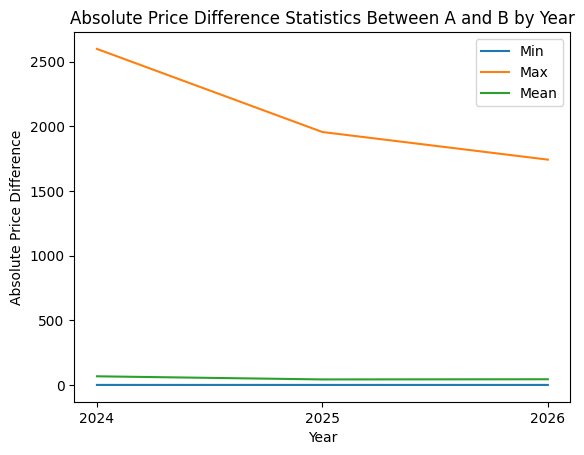

In [33]:
plt.plot(df_stats_year['Year'], df_stats_year['Min'], label='Min')
plt.plot(df_stats_year['Year'], df_stats_year['Max'], label='Max')
plt.plot(df_stats_year['Year'], df_stats_year['Mean'], label='Mean')

plt.xticks(df_stats_year['Year'],["2024","2025","2026"])
plt.xlabel('Year')
plt.ylabel('Absolute Price Difference')
plt.title("Absolute Price Difference Statistics Between A and B By Year")
plt.legend()
plt.show()

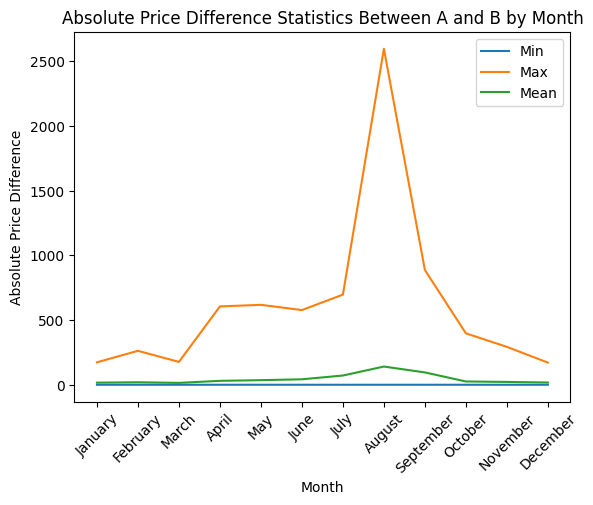

In [37]:
plt.plot(df_stats_month['Month'], df_stats_month['Min'], label='Min')
plt.plot(df_stats_month['Month'], df_stats_month['Max'], label='Max')
plt.plot(df_stats_month['Month'], df_stats_month['Mean'], label='Mean')

plt.xticks(df_stats_month['Month'],
           ["January","February","March", "April","May","June","July","August","September","October","November","December"],
           rotation=45)
plt.xlabel('Month')
plt.ylabel('Absolute Price Difference')
plt.title("Absolute Price Difference Statistics Between A and B By Month")
plt.legend()
plt.show()

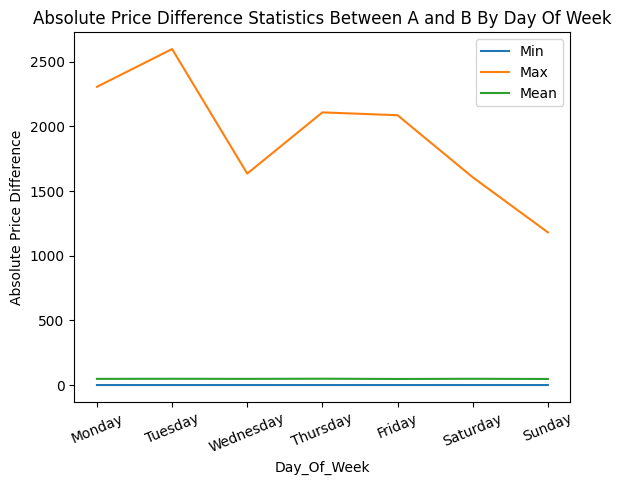

In [44]:
plt.plot(df_stats_day_of_week['Day_Of_Week'], df_stats_day_of_week['Min'], label='Min')
plt.plot(df_stats_day_of_week['Day_Of_Week'], df_stats_day_of_week['Max'], label='Max')
plt.plot(df_stats_day_of_week['Day_Of_Week'], df_stats_day_of_week['Mean'], label='Mean')

plt.xticks(df_stats_day_of_week['Day_Of_Week'],
           ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
           rotation=22.5)
plt.xlabel('Day_Of_Week')
plt.ylabel('Absolute Price Difference')
plt.title("Absolute Price Difference Statistics Between A and B By Day Of Week")
plt.legend()
plt.show()

In [38]:
df_stats_day_of_week['Day_Of_Week']

0    0
1    1
2    2
3    3
4    4
5    5
6    6
Name: Day_Of_Week, dtype: int32

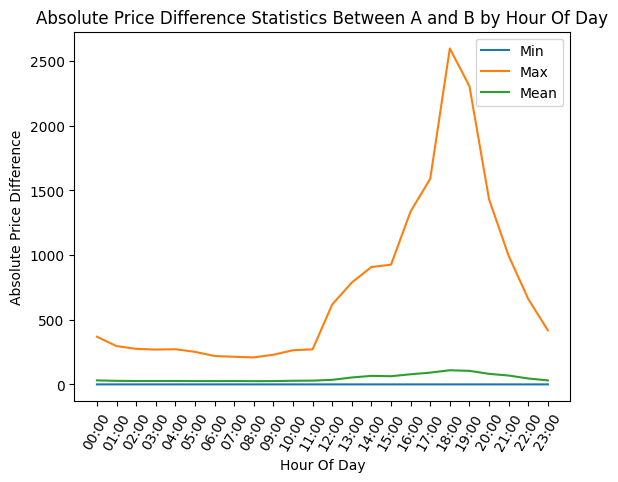

In [43]:
plt.plot(df_stats_hour_of_day['Hour_Of_Day'], df_stats_hour_of_day['Min'], label='Min')
plt.plot(df_stats_hour_of_day['Hour_Of_Day'], df_stats_hour_of_day['Max'], label='Max')
plt.plot(df_stats_hour_of_day['Hour_Of_Day'], df_stats_hour_of_day['Mean'], label='Mean')

plt.xticks(df_stats_hour_of_day['Hour_Of_Day'],
           ["00:00","01:00","02:00","03:00","04:00","05:00","06:00","07:00","08:00","09:00","10:00","11:00",
            "12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"],
           rotation=45)
plt.xlabel('Hour Of Day')
plt.ylabel('Absolute Price Difference')
plt.title("Absolute Price Difference Statistics Between A and B by Hour Of Day")
plt.legend()
plt.show()
plt.savefig("")

In [41]:
df_stats_hour_of_day['Hour_Of_Day']

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
Name: Hour_Of_Day, dtype: int32